https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [2]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing

from keras.utils import np_utils
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense


figure_path = module_path + '/figures/'

In [20]:
X_train, y_train_ = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/UiT_5s_TRAIN.ts')
X_test, y_test_ = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/UiT_5s_TEST.ts')

X_train, X_test = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns = cols, cols

y_train_, y_test_, = pd.Series(y_train_), pd.Series(y_test_)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

## Keeping the original classes

In [197]:
indices_1 = np.where(y_train_ == 'normal')[0]
indices_2 = np.where(y_train_ == 'exp_wheeze')[0]
indices_3 = np.where(y_train_ == 'insp_crackle')[0]
indices_4 = np.where(y_train_ == 'insp_wheeze')[0]
indices_5 = np.where(y_train_ == 'exp_crackle')[0]
#indices_train = np.concatenate((indices_1[0:25], indices_2[:25], indices_3[:25], indices_4, indices_5))
indices_train = np.concatenate((indices_2[:25], indices_3[:25], indices_4, indices_5))

indices_1 = np.where(y_test_ == 'normal')[0]
indices_2 = np.where(y_test_ == 'exp_wheeze')[0]
indices_3 = np.where(y_test_ == 'insp_crackle')[0]
indices_4 = np.where(y_test_ == 'insp_wheeze')[0]
indices_5 = np.where(y_test_ == 'exp_crackle')[0]
#indices_test = np.concatenate((indices_1, indices_2, indices_3, indices_4, indices_5))
indices_test = np.concatenate((indices_2, indices_3, indices_4, indices_5))

In [198]:
le = preprocessing.LabelEncoder()

le.fit(y_train_[indices_train])
num_classes = len(le.classes_)
y_train = le.transform(y_train_[indices_train])
y_test = le.transform(y_test_[indices_test])

y_train = np_utils.to_categorical(y_train, num_classes = num_classes)
y_test = np_utils.to_categorical(y_test, num_classes = num_classes)

## Creating subclasses 

In [21]:
y_train_new = y_train_.copy(deep = True)

y_train_new[y_train_new == 'exp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'insp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'exp_crackle'] = 'crackle'
y_train_new[y_train_new == 'insp_crackle'] = 'crackle'

y_test_new = y_test_.copy(deep = True)

y_test_new[y_test_new == 'exp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'insp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'exp_crackle'] = 'crackle'
y_test_new[y_test_new == 'insp_crackle'] = 'crackle'

In [22]:
indices_1 = np.where(y_train_new == 'normal')[0]
indices_2 = np.where(y_train_new == 'wheeze')[0]
indices_3 = np.where(y_train_new == 'crackle')[0]
#indices_train = np.concatenate((indices_2, indices_3))
#indices_train = np.concatenate((indices_1[:250], indices_2, indices_3))
indices_train = np.concatenate((indices_1[:1350], indices_2, indices_3))


indices_1 = np.where(y_test_new == 'normal')[0]
indices_2 = np.where(y_test_new == 'wheeze')[0]
indices_3 = np.where(y_test_new == 'crackle')[0]
#indices_test = np.concatenate((indices_2, indices_3))
indices_test = np.concatenate((indices_1, indices_2, indices_3))

In [23]:
le = preprocessing.LabelEncoder()

le.fit(y_train_new[indices_train])
num_classes = len(le.classes_)
y_train = le.transform(y_train_new[indices_train])
y_test = le.transform(y_test_new[indices_test])

y_train = np_utils.to_categorical(y_train, num_classes = num_classes)
y_test = np_utils.to_categorical(y_test, num_classes = num_classes)

# Models

In [ ]:
model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation= 'relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = ‘same’, activation=’relu’))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation=’tanh’))
model.add(Dropout(0.2))
model.add(Dense(32, activation=’tanh’))
model.add(Dropout(0.2))
model.add(Dense(16, activation=’relu’))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation=’softmax’))
model.summary()

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=20, activation='relu', input_shape=(n_timesteps,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Comments

* Adding batch normalization makes so that only one class is guessed always

In [24]:
batch_size = 100
epochs = 50
input_shape=(X_train.shape[1], 1)

In [25]:
model = Sequential()

model.add(Conv1D(filters=10, kernel_size=3, activation='relu', input_shape=input_shape))
#model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1500, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 19998, 10)         40        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 999, 10)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9990)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              14986500  
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 4503      
Total params: 14,991,043
Trainable params: 14,991,043
Non-trainable params: 0
_________________________________________________________________


In [27]:
X_train[indices_train].shape

(4012, 20000, 1)

In [28]:
model.fit(X_train[indices_train], y_train, epochs = epochs,
          batch_size = batch_size,
          verbose = 1)

Epoch 1/50
41/41 [==============================] - 8s 178ms/step - loss: 0.2216
Epoch 2/50
41/41 [==============================] - 7s 177ms/step - loss: 0.2136
Epoch 3/50
41/41 [==============================] - 7s 166ms/step - loss: 0.2014
Epoch 4/50
41/41 [==============================] - 7s 165ms/step - loss: 0.1886
Epoch 5/50
41/41 [==============================] - 7s 168ms/step - loss: 0.1641
Epoch 6/50
41/41 [==============================] - 7s 183ms/step - loss: 0.1473
Epoch 7/50
41/41 [==============================] - 7s 176ms/step - loss: 0.1236
Epoch 8/50
41/41 [==============================] - 7s 177ms/step - loss: 0.1059
Epoch 9/50
41/41 [==============================] - 7s 175ms/step - loss: 0.0879
Epoch 10/50
41/41 [==============================] - 7s 174ms/step - loss: 0.0664
Epoch 11/50
41/41 [==============================] - 7s 179ms/step - loss: 0.0512
Epoch 12/50
41/41 [==============================] - 7s 175ms/step - loss: 0.0419
Epoch 13/50
41/41 [======

'f.set_size_inches(10, 10)\n\nfor item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +\n             ax.get_xticklabels() + ax.get_yticklabels()):\n    item.set_fontsize(15)'

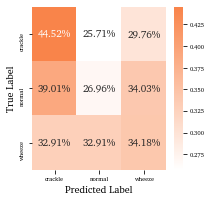

In [29]:
classes = le.classes_

result = model.predict(X_test[indices_test])
y_pred = np.argmax(result, axis = 1)
y_true = np.argmax(y_test, axis = 1)

f, ax = utility.plot_cm(y_true, y_pred, module_path = module_path, class_names = classes, color_index = 3)

f.savefig(figure_path + f'TSC/cm_uit_CNN_5s.pdf', bbox_inches='tight')


'''f.set_size_inches(10, 10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)'''

In [141]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

NameError: name 'filters' is not defined

In [47]:
X_test[0, :, :]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

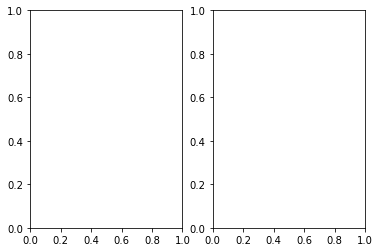

In [50]:
from vis.visualization import visualize_saliency, overlay

f, ax = plt.subplots(1, 2)
  
    # 20 is the imagenet index corresponding to `ouzel`
grads = visualize_saliency(model, 0, filter_indices=5, seed_input=X_test[0, :, :])
    
    # visualize grads as heatmap
ax.imshow(grads, cmap='jet')